# <center>R5.A.11 - Méthodes d'optimisation <br> TP1a - Recuit Simulé<center>


_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_


Ce TP est inspiré de l'article **Sudokus et algorithmes de recuit** écrit par _**Renaud Sirdey**_ dans le  magazine _Quadrature_ n°62


R. Sirdey, « Sudokus et algorithmes de recuit »,
Quadrature 62 (Oct.–Déc. 2006) 9–13

### imports


In [1]:
import numpy as np

import random

import math
# Affichage graphique

#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline


import matplotlib.pyplot as plt

import time

from ipywidgets import interact
import ipywidgets as widgets



## Vocabulaire et intuition

La méthode du recuit simulé (en anglais _simulated annealing_) a été proposée en informatique dans les années 80, par analogie avec une technique dite du recuit, utilisée en science de matériaux et en particulier en sidérurgie.

Il s'agit d'un principe général de construction d'algorithmes pour résoudre des problèmes d'optimisation difficiles.

Cette métaheuristique est assez bien comprise, d'un point de vue théorique, et permet la création d'algorithmes relativement simples. 

Soit un problème d'optimisation combinatoire où l'on a 


- un ensemble de configuration $\Omega = \{w_1,...,w_N\}$

- une fonction de coût (aussi appelée fonction d'energie) $c:\Omega \to \mathbb{R}_+$

- une fonction de voisinage $V:\Omega \to \mathcal{P}(\Omega)$



La méthode du recuit simulé vise à trouver la configuration de coût (energie) minimal.


La méthode est alors assez intuitive : 

Au départ on commence avec une configuration arbitraire. 

Soit $w$ la configuration courante. 

À chaque itération, une configuration candidate $w'$ est choisie uniformément dans le voisinage de la solution courante ; et acceptée avec une probabilité $\min( 1, e^{-\frac{c(w) -c(w')}{T}})$

Le paramètre $T$ s’appelle la _température_ et tend vers $0$ (de manière
monotone), selon une fonction appelée _loi de décroissance de la température_. La meilleure solution rencontrée durant l’exécution de l’algorithme est mémorisée et écrite lorsque la condition d’arrêt choisie est vérifiée.

## 1 - Optimisation de fonction 1D

On va commencer par des exemples simples : des fonctions $f : \: \mathbb{R} \to \mathbb{R}$ (comme l'an dernier en R4.04), et pour débuter la fonction définie par $f(x) = x^2 -1$.

Pour fonction de voisinage, on prendra comme transition la loi uniforme sur $[-0.5, 0,5]$ (ce choix est arbitraire mais malheureusement a un impact non négligeable sur la vitesse de convergence).

Contrairement à la méthode de gradient de l'an dernier, la recherche n'est pas dirigée mais ressemble plus à une marche au hasard. 

Avantage : simplicité (pas de dérivée à calculer, moins de conditions)

Inconvénient : on exploite pas du tout la structure locale de la fonction.

> __Question 1__ : Bien lire le code donné ci-dessous, le comprendre et le commenter

In [15]:
def f(x):
    #fonction simple à tester
    #minimum théorique f(0)=-1
    return x**2 - 1

def simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate):
    current_x = initial_x
    current_energy = f(current_x)
    temperature = initial_temperature

    for iteration in range(max_iterations):
        # Generate a neighboring solution
        delta_x = random.uniform(-0.5, 0.5)
        new_x = current_x + delta_x
        new_energy = f(new_x)

        # Calculate the change in energy
        delta_energy = new_energy - current_energy

        # Accept the new solution if it's better or with a certain probability
        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_x = new_x
            current_energy = new_energy

        # Cool down the temperature
        temperature *= cooling_rate

    return current_x, f(current_x)

#initial_x = random.uniform(-10, 10)
initial_x = math.pi
max_iterations = 1000
initial_temperature = 1.0
cooling_rate = 0.99

min_x, min_value = simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate)

print(f"Minimum value found at x = {min_x}, f(x) = {min_value}")


Minimum value found at x = 0.013798146142282475, f(x) = -0.9998096111630362


Cette fonction marche plutôt bien, mais on n'a pas trop d'idée de ce qui s'est passé.
On va donc la réécrire en conservant l'historique (et en ajoutant des widgets pour essayer de mieux comprendre ce qui se passe.

In [16]:
def simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate):
    current_x = initial_x
    current_energy = f(current_x)
    temperature = initial_temperature

    x_values = [current_x]
    energy_values = [current_energy]

    for iteration in range(max_iterations):
        delta_x = random.uniform(-0.5, 0.5)
        new_x = current_x + delta_x
        new_energy = f(new_x)

        delta_energy = new_energy - current_energy

        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_x = new_x
            current_energy = new_energy

        temperature *= cooling_rate

        x_values.append(current_x)
        energy_values.append(current_energy)

    return x_values, energy_values

def plot_simulated_annealing(initial_temperature, cooling_rate):
    #initial_x = random.uniform(-10, 10)
    initial_x = math.pi
    #fixed for comparaisons    
    max_iterations = 100
    cmap = plt.get_cmap('viridis')

    
    
    x_values, energy_values = simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate)

    
    # Plot the function curve and the current state
    x = np.arange(-15, 15,0.01)
    y = [f(xi) for xi in x]

    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)

    plt.plot(x, y, label='Function Curve')
    plt.scatter(x_values, [f(xi) for xi in x_values], c=range(len(x_values)), cmap=cmap, label='Current State', marker='o')
    plt.title('Simulated Annealing Optimization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

    
    

    plt.subplot(2, 1, 2)
    plt.plot(energy_values, label='x')
    plt.title('Energy')
    plt.xlabel('Iteration')
    plt.ylabel('x')

    plt.tight_layout()
    plt.show()

interact(
    plot_simulated_annealing,
    initial_temperature=widgets.FloatSlider(min=0.01, max=10.0, step=0.01, value=1.0, description='Initial Temp.'),
    cooling_rate=widgets.FloatSlider(min=0.90, max=0.9999, step=0.0001, value=0.99, description='Cooling Rate')
)

interactive(children=(FloatSlider(value=1.0, description='Initial Temp.', max=10.0, min=0.01, step=0.01), Floa…

<function __main__.plot_simulated_annealing(initial_temperature, cooling_rate)>

> __Question 2__ : Expliquez ce que change les paramètres `initial_temperature` et `cooling_rate` dans le comportement de l'algorithme.
Tester l'algorithme fourni sur les différentes fonctions à optimiser proposées.

In [18]:
def f(x):
    #return x**2 - 1
    #https://machinelearningmastery.com/1d-test-functions-for-function-optimization/
    #return -(x + math.sin(x)) * math.exp(-x**2.0)
    return math.sin(x) + math.sin((10.0 / 3.0) * x)

    

interact(
    plot_simulated_annealing,
    initial_temperature=widgets.FloatSlider(min=0.01, max=5.0, step=0.01, value=1.0, description='Initial Temp.'),
    cooling_rate=widgets.FloatSlider(min=0.90, max=0.9999, step=0.0001, value=0.99, description='Cooling Rate')
)


interactive(children=(FloatSlider(value=1.0, description='Initial Temp.', max=5.0, min=0.01, step=0.01), Float…

<function __main__.plot_simulated_annealing(initial_temperature, cooling_rate)>

> __Question bonus__ : Comparer cette fonction avec les résultats obtenu par descente de gradient en BUT 2

## 2 - Résolution d'un Sudoku

Dans cette partie nous allons programmer un algorithme de résolution de sudoku en utilisant la méthode du recuit simulé. 

Les différents enjeux sont :
- Adapter l'implémentation vu dans la partie 1 à un nouvel ensemble de configuration (les différents sudoku possibles). 
- Trouver une fonction de coût $c$ adéquat (aussi appelé énergie).

En langage naturel cela donne:



<div class= 'alert alert-block alert-info'>
<tt>    
  
<b>
Recuit simulé
</b> 

    
  
Poser $\delta = 0.1$, et $T = 810$

<t>  
Choisir $w$ arbitrairement, et faire $c = c(w)$
    
>Tant que $T \geqslant 0.002$, faire    <br> 
>>Choisir $i$ et $j$ uniformément  <br> 
>>Créer une nouvelle configuration $w_{i,j}$ en assignant une nouvelle valeur aléatoire à la case $[i,j]$ <br> 
>>Faire $c' = c_{ij}(w_{i,j})$ <br> 
>>Choisir $u$ uniformément dans [0,1]  <br>     
    
>>Si $u \leqslant e^{-\frac{c'-c}{T}}$, alors <br> 
>>>faire $c = c'$ (acceptation) <br>  
    
>>Sinon  <br> 
>>>faire $w = w$ (rejet) <br> 
    
>>Si $c = 0$, alors écrire $w$ et s'arrêter. <br> 
>>Faire $T = \frac{T}{1+\frac{log(1+\delta)}{811}T}$ <br> 
    
>Fin Tant que <br> 
</t>

</tt>    


</div>


La première étape est d'être capable de vérifier si une certaine grille de sudoku est valide.

>__Question 3__ : Définire une fonction `is_valid_sudoku` qui étant donné une grille `grid` sous forme de matrice renvoie `True` si la grille est complète et vérifie les différentes règles du sudoku, et renvoie `False` sinon.


In [20]:
def is_valid_sudoku(grid):
    # Check rows


    # Check columns


    # Check 3x3 subgrids (boxes)
    for i in range(0, 9, 3):
        for j in range(0, 9, 3):
            box = [grid[x][y] for x in range(i, i + 3) for y in range(j, j + 3)]
            if not is_valid_unit(box):
                return False

    return True

def is_valid_unit(unit):
    unit = [num for num in unit if num != 0]
    return len(unit) == len(set(unit))


C'est le moment de choisir une fonction d'energie associée à votre méthode de recuit simulé.

>__Question 4__ : Définissez une fonction `energy` qui, étant donnée une grille de sudoku `state` sous forme de matrice, renvoie la valeur d'énergie (ou de coût) de cette grille. Nous voulons une énergie minimale (idéalement $0$) lorsque le sudoku est complètement résolu.

In [21]:
def print_sudoku(grid):
    for row in grid:
        print(' '.join(map(str, row)))




def energy(state):
    
    e=0

    return e/2

>__Question 5__ : Implémentez la fonction `simulated_annealing` correspondant à la méthode de recuit simulé. Étant donnée la grille de départ `grid`, et les différents paramètres `max_iterations`, `initial_temperature` ainsi que `cooling_rate`, la fonction renvoie la grille résolue de sudoku si elle a été obtenu en un nombre d'itérations plus petit que `max_iterations`.

In [ ]:
def simulated_annealing(grid, max_iterations, initial_temperature, cooling_rate):
    current_state=[]
    energy_history = []  # To store energy at each iteration
 

Tester vos fonctions sur différentes grilles

In [1]:
easy = [[0, 0, 0, 1, 0, 9, 4, 2, 7],
        [1, 0, 9, 8, 0, 0, 0, 0, 6],
        [0, 0, 7, 0, 5, 0, 1, 0, 8],
        [0, 5, 6, 0, 0, 0, 0, 8, 2],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [9, 4, 0, 0, 0, 0, 6, 1, 0],
        [7, 0, 4, 0, 6, 0, 9, 0, 0],
        [6, 0, 0, 0, 0, 8, 2, 0, 5],
        [2, 9, 5, 3, 0, 1, 0, 0, 0]]

medium = [[5, 8, 0, 0, 0, 1, 0, 0, 0],
        [0, 3, 0, 0, 6, 0, 0, 7, 0],
        [9, 0, 0, 3, 2, 0, 1, 0, 6],
        [0, 0, 0, 0, 0, 0, 0, 5, 0],
        [3, 0, 9, 0, 0, 0, 2, 0, 1],
        [0, 5, 0, 0, 0, 0, 0, 0, 0],
        [6, 0, 2, 0, 5, 7, 0, 0, 8],
        [0, 4, 0, 0, 8, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 6, 5]]

evil = [[0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 6, 0, 0, 0, 0, 3],
        [0, 7, 4, 0, 8, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 0, 0, 2],
        [0, 8, 0, 0, 4, 0, 0, 1, 0],
        [6, 0, 0, 5, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 7, 8, 0],
        [5, 0, 0, 0, 0, 9, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 4, 0]]

hard = [[0, 2, 0, 0, 0, 0, 0, 3, 0],
        [0, 0, 0, 6, 0, 1, 0, 0, 0],
        [0, 6, 8, 2, 0, 0, 0, 0, 5],
        [0, 0, 9, 0, 0, 8, 3, 0, 0],
        [0, 4, 6, 0, 0, 0, 7, 5, 0],
        [0, 0, 1, 3, 0, 0, 4, 0, 0],
        [9, 0, 0, 0, 0, 7, 5, 1, 0],
        [0, 0, 0, 1, 0, 4, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 9, 0]]

solved = [[1, 2, 7, 4, 8, 5, 9, 3, 6],
          [5, 9, 3, 6, 7, 1, 8, 4, 2],
          [4, 6, 8, 2, 3, 9, 1, 7, 5],
          [2, 5, 9, 7, 4, 8, 3, 6, 1],
          [3, 4, 6, 9, 1, 2, 7, 5, 8],
          [7, 8, 1, 3, 5, 6, 4, 2, 9],
          [9, 3, 2, 8, 6, 7, 5, 1, 4],
          [6, 7, 5, 1, 9, 4, 2, 8, 3],
          [8, 1, 4, 5, 2, 3, 6, 9, 7]]

energy(solved)
sudoku_grid = easy

**failure :/ ** max iteration reached and energy is non-zero : energy=  7.0
Solved Sudoku:
8 6 5 1 3 9 4 2 7
1 4 9 8 7 2 5 3 6
3 2 7 4 5 6 1 9 8
7 5 6 9 1 4 3 8 2
4 1 8 6 2 3 7 5 9
9 4 2 5 8 7 6 1 1
7 8 4 2 6 5 9 1 3
6 3 1 7 9 8 2 4 5
2 9 5 3 4 1 8 7 6
Is valid Sudoku: False


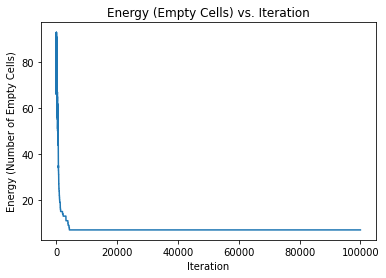

[[0 0 0 1 0 9 4 2 7]
 [1 0 9 8 0 0 0 0 6]
 [0 0 7 0 5 0 1 0 8]
 [0 5 6 0 0 0 0 8 2]
 [0 0 0 0 2 0 0 0 0]
 [9 4 0 0 0 0 6 1 0]
 [7 0 4 0 6 0 9 0 0]
 [6 0 0 0 0 8 2 0 5]
 [2 9 5 3 0 1 0 0 0]]
[[-8 -6 -5  0 -3  0  0  0  0]
 [ 0 -4  0  0 -7 -2 -5 -3  0]
 [-3 -2  0 -4  0 -6  0 -9  0]
 [-7  0  0 -9 -1 -4 -3  0  0]
 [-4 -1 -8 -6  0 -3 -7 -5 -9]
 [ 0  0 -2 -5 -8 -7  0  0 -1]
 [ 0 -8  0 -2  0 -5  0 -1 -3]
 [ 0 -3 -1 -7 -9  0  0 -4  0]
 [ 0  0  0  0 -4  0 -8 -7 -6]]
7.0


In [75]:
max_iterations = 100000
initial_temperature = 810
cooling_rate = 0.99

solved_sudoku, energy_history = simulated_annealing(sudoku_grid, max_iterations, initial_temperature, cooling_rate)

print("Solved Sudoku:")
print_sudoku(solved_sudoku)
print("Is valid Sudoku:",is_valid_sudoku(solved_sudoku))

# Plot the energy history
plt.plot(range(len(energy_history)), energy_history)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy vs. Iteration')
plt.show()

print(np.asarray(sudoku_grid))
    
print(np.asarray(sudoku_grid)-np.asarray(solved_sudoku))

print(energy(solved_sudoku))

__Question 6__  Vérifier si la solution contient les chiffres de départ du sudoku. Corriger votre code si ce n'est pas le cas

__Question 7__  Implémenter la version (plus complexe) de l'article **Sudokus et algorithmes de recuit** écrit par _**Renaud Sirdey** (sur le moodle)

__Question 8__ (bonus) : Comparez la convergence de cette méthode pour différentes fonctions d'énergie et d'évolution de la température.

0.0

### À venir : 
TP1b : voyageur de commerce

### Extensions possibles:



https://math.stackexchange.com/questions/2096176/are-there-3-disjoint-copies-of-2k-3-3-cup-k-5-5-setminus-c-10-in

